In [1]:
import pandas as pd 


In [13]:
df = pd.read_csv('data/LegoStatsMainV1.csv')
df2 = pd.read_csv('data/LegoStatsMainV2.csv')

In [ ]:
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(df, test_size=0.2)
print(len(train_df), len(test_df))

Training R2 Score: 0.5328093079235063
Training MAE Score: 0.09347811926497417
Test R2 Score: 0.37238815799719827
Test MAE Score: 0.09692786541162277


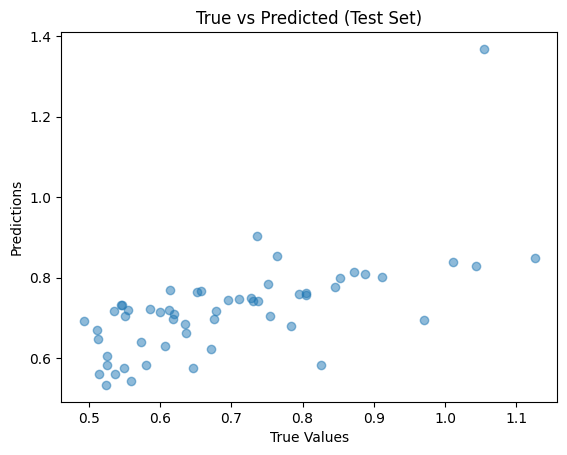

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn import linear_model
import matplotlib.pyplot as plt
import pandas as pd

df_encoded = pd.get_dummies(df, columns=['category'], drop_first=True)

df_model = df_encoded[['set_id', 'num_parts', 'num_figs', 'retail_price',
    'num_unique_figs', 'set_rating', 'pop_price', 
    'num_reviews', 'return']]

X = df_model.drop(['return'], axis=1)
y = df_model['return']

X = X.apply(pd.to_numeric, errors='coerce')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = linear_model.LinearRegression()
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
print("Training R2 Score:", r2_score(y_train, y_train_pred))
print("Training MAE Score:", mean_absolute_error(y_train, y_train_pred))

y_test_pred = model.predict(X_test)
print("Test R2 Score:", r2_score(y_test, y_test_pred))
print("Test MAE Score:", mean_absolute_error(y_test, y_test_pred))

plt.scatter(y_test, y_test_pred, alpha=0.5)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.title("True vs Predicted (Test Set)")
plt.show()
